In [ ]:
#102103272_KHUSHI ARORA_Sampling Assignment
#I have loaded the dataset
import pandas as pd
file_path = '/content/102103043_Creditcard_data.csv'
df = pd.read_csv(file_path)
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
df.shape

(772, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [ ]:
#class distribution

class_distribution = df['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Number of classes
num_classes = len(class_distribution)
print("Number of Classes:", num_classes)


Class Distribution:
0    763
1      9
Name: Class, dtype: int64
Number of Classes: 2


In [ ]:
#So We get to know that our dataset is highly imbalanced with 763 instances of class 0
# only 9 instances of class 1
#So Now I am going to balance the dataset


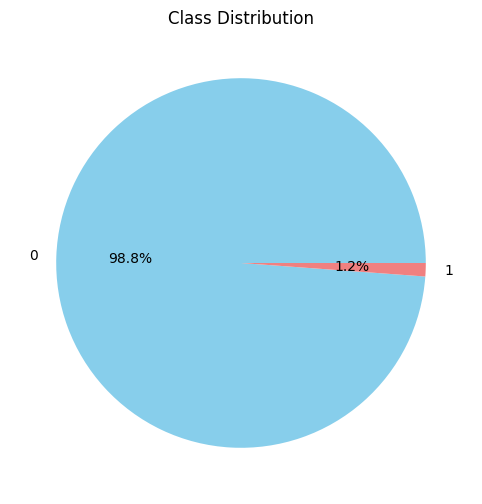

In [ ]:
import matplotlib.pyplot as plt
class_distribution = df['Class'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Class Distribution')
plt.show()


In [ ]:
#using RandomOverSampler to balance the dataset

from imblearn.over_sampling import RandomOverSampler
X = df.drop('Class', axis=1)
y = df['Class']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Class')

balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

class_distribution_balanced = balanced_df['Class'].value_counts()
print("Class Distribution of Balanced Dataset:")
print(class_distribution_balanced)


Class Distribution of Balanced Dataset:
0    763
1    763
Name: Class, dtype: int64


In [ ]:
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


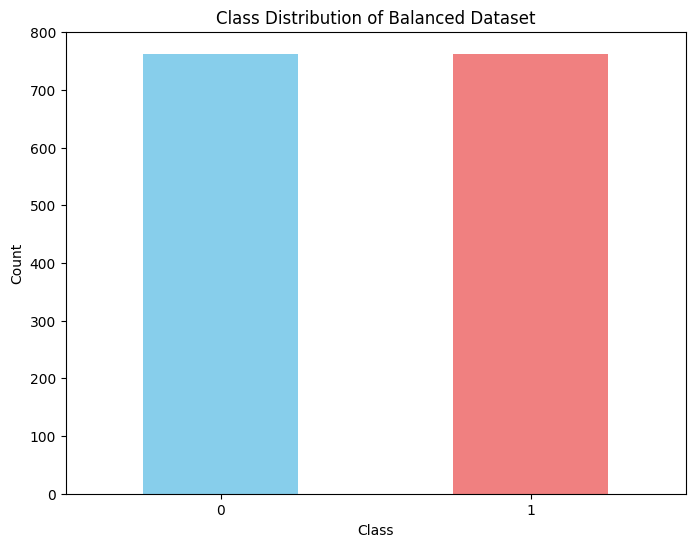

In [ ]:
import matplotlib.pyplot as plt
#graph for balanced dataset
plt.figure(figsize=(8, 6))
balanced_df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Class Distribution of Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
#(i) Simple random Sampling
import numpy as np
# Calculate sample size using the formula
#where n= (Z^2 * p * (1-p)/E^2)
n_simple_random = int(np.ceil((1.96**2 * 0.5 * (1 - 0.5)) / 0.05**2))
min_class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_simple_random = min(n_simple_random, min_class_size)

sample_simple_random = balanced_df.sample(n=n_simple_random, random_state=42)

print("Sample Size for Simple Random Sampling:", sample_simple_random.shape[0])


Sample Size for Simple Random Sampling: 385


In [ ]:
#(ii) Stratified Sampling
p = 0.5   # Estimated proportion

# Calculate sample size using the formula
#(Z**2 * p * (1 - p)) / (E/S)**2)
#S is no of strata, S=2 bcz of the two classes
n_stratified = int(np.ceil((1.96**2 * 0.5 * (1 - 0.5)) / (0.05/2)**2))

min_class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_stratified = min(n_stratified, min_class_size)

sample_stratified = pd.DataFrame()
for class_label in balanced_df['Class'].unique():
    class_samples = balanced_df[balanced_df['Class'] == class_label]
    sample_size_per_class = int(np.ceil((len(class_samples) / len(balanced_df)) * n_stratified))
    class_sample = class_samples.sample(n=sample_size_per_class, random_state=42)
    sample_stratified = pd.concat([sample_stratified, class_sample])

print("Sample Size for Stratified Sampling:", sample_stratified.shape[0])


Sample Size for Stratified Sampling: 764


In [ ]:
#(iii) Cluster Sampling
C = 50  # here C is avg size of cluster
# Calculate sample size using the formula
Z=1.96
p=0.5
E=0.05
n_cluster = int(np.ceil((Z**2 * p * (1 - p)) / (E / C)**2))

min_class_size = min(len(balanced_df[balanced_df['Class'] == 0]), len(balanced_df[balanced_df['Class'] == 1]))
n_cluster = min(n_cluster, min_class_size)

sample_cluster = pd.DataFrame()
cluster_indices = np.array_split(balanced_df.index, n_cluster)
for cluster_index in cluster_indices:
    cluster_sample = balanced_df.loc[cluster_index].sample(random_state=42)
    sample_cluster = pd.concat([sample_cluster, cluster_sample])

print("Sample Size for Cluster Sampling:", sample_cluster.shape[0])


Sample Size for Cluster Sampling: 763


In [ ]:
#iv
#bootstrap sampling

from sklearn.utils import resample

np.random.seed(42)
n_bootstrap = len(balanced_df)
sample_bootstrap = resample(balanced_df, replace=True, n_samples=n_bootstrap, random_state=42)
print("Sample Size for Bootstrap Sampling:", sample_bootstrap.shape[0])



Sample Size for Bootstrap Sampling: 1526


In [ ]:
#v
#systematic sampling
k = len(balanced_df) // 1000
n_systematic = len(balanced_df) // k
sample_systematic = balanced_df.iloc[::k]

print("Sample Size for Systematic Sampling:", sample_systematic.shape[0])


Sample Size for Systematic Sampling: 1526


# LOGISTIC REGRESSION OVER EACH SAMPLE AND FINDING ACCURACY

In [ ]:
#SIMPLE RANDOM Sampling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_test = logistic_regression.predict(X_test)

accuracy_simple_random_test = accuracy_score(y_test, y_pred_test)
print("Accuracy for Simple Random Sampling with Train-Test Split:", accuracy_simple_random_test)



Accuracy for Simple Random Sampling with Train-Test Split: 0.8831168831168831


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#STRATIFIED Sampling
X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_test = logistic_regression.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Stratified Sampling with Train-Test Split:", accuracy_stratified_test)


Accuracy for Stratified Sampling with Train-Test Split: 0.8888888888888888


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Cluster Sampling

X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, y_train)
y_pred_test = logistic_regression.predict(X_test)
accuracy_cluster_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Cluster Sampling with Train-Test Split:", accuracy_cluster_test)


Accuracy for Cluster Sampling with Train-Test Split: 0.954248366013072


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Bootstrap Sampling

X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression(random_state=42)

logistic_regression.fit(X_train, y_train)
y_pred_test = logistic_regression.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Bootstrap Sampling with Train-Test Split:", accuracy_bootstrap_test)


Accuracy for Bootstrap Sampling with Train-Test Split: 0.9477124183006536


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Systematic Sampling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
logistic_regression = LogisticRegression(random_state=42)

X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']
X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.2, random_state=42)

logistic_regression.fit(X_train, y_train)
y_pred_test = logistic_regression.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Systematic Sampling with Train-Test Split:", accuracy_systematic_test)


Accuracy for Systematic Sampling with Train-Test Split: 0.9183006535947712


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **RANDOM FOREST CLASSIFIER**

In [ ]:
#SIMPLE RANDOM Sampling

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random_forest = RandomForestClassifier(random_state=42)
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_test = random_forest.predict(X_test)
accuracy_simple_random_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Simple Random Sampling with Random Forest:", accuracy_simple_random_test)


Accuracy for Simple Random Sampling with Random Forest: 0.987012987012987


In [ ]:
#STRATIFIED Sampling

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
random_forest = RandomForestClassifier(random_state=42)
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']


X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)

random_forest.fit(X_train, y_train)

y_pred_test = random_forest.predict(X_test)
accuracy_stratified_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Stratified Sampling with Random Forest:", accuracy_stratified_test)


Accuracy for Stratified Sampling with Random Forest: 1.0


In [ ]:
#CLUSTER Sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random_forest = RandomForestClassifier(random_state=42)
X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']

X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_test = random_forest.predict(X_test)

accuracy_cluster_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Cluster Sampling with Random Forest:", accuracy_cluster_test)


Accuracy for Cluster Sampling with Random Forest: 0.9967320261437909


In [ ]:
#Bootstrap Sampling

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random_forest = RandomForestClassifier(random_state=42)

X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']

X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)

random_forest.fit(X_train, y_train)
y_pred_test = random_forest.predict(X_test)

accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Bootstrap Sampling with Random Forest:", accuracy_bootstrap_test)


Accuracy for Bootstrap Sampling with Random Forest: 1.0


In [ ]:
#Systematic Sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

random_forest = RandomForestClassifier(random_state=42)
X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']

X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)

random_forest.fit(X_train, y_train)
y_pred_test = random_forest.predict(X_test)

accuracy_systematic_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Systematic Sampling with Random Forest:", accuracy_systematic_test)


Accuracy for Systematic Sampling with Random Forest: 0.9983633387888707


# DECISION TREES Classifier



In [ ]:
#simple random Sampling

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
decision_tree = DecisionTreeClassifier(random_state=42)
X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X_simple_random, y_simple_random, test_size=0.4, random_state=42)

decision_tree.fit(X_train, y_train)

y_pred_test = decision_tree.predict(X_test)

accuracy_simple_random_test = accuracy_score(y_test, y_pred_test)
print("Accuracy for Simple Random Sampling with Decision Tree:", accuracy_simple_random_test)


Accuracy for Simple Random Sampling with Decision Tree: 0.9675324675324676


In [ ]:
#stratified Sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

decision_tree = DecisionTreeClassifier(random_state=42)

X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']

X_train, X_test, y_train, y_test = train_test_split(X_stratified, y_stratified, test_size=0.4, random_state=42)

decision_tree.fit(X_train, y_train)

y_pred_test = decision_tree.predict(X_test)

accuracy_stratified_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Stratified Sampling with Decision Tree:", accuracy_stratified_test)


Accuracy for Stratified Sampling with Decision Tree: 0.9967320261437909


In [ ]:
#Cluster Sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

decision_tree = DecisionTreeClassifier(random_state=42)

X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']
X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test = decision_tree.predict(X_test)

accuracy_cluster_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Cluster Sampling with Decision Tree:", accuracy_cluster_test)


Accuracy for Cluster Sampling with Decision Tree: 0.9869281045751634


In [ ]:
#Bootstrap Sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

decision_tree = DecisionTreeClassifier(random_state=42)
X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']

X_train, X_test, y_train, y_test = train_test_split(X_bootstrap, y_bootstrap, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test = decision_tree.predict(X_test)
accuracy_bootstrap_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Bootstrap Sampling with Decision Tree:", accuracy_bootstrap_test)


Accuracy for Bootstrap Sampling with Decision Tree: 0.9983633387888707


In [ ]:
#Systematic Sampling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
decision_tree = DecisionTreeClassifier(random_state=42)

X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']

X_train, X_test, y_train, y_test = train_test_split(X_systematic, y_systematic, test_size=0.4, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_test = decision_tree.predict(X_test)
accuracy_systematic_test = accuracy_score(y_test, y_pred_test)

print("Accuracy for Systematic Sampling with Decision Tree:", accuracy_systematic_test)


Accuracy for Systematic Sampling with Decision Tree: 0.9852700490998363


### **Support Vector Machines (SVM)**

In [ ]:
#simple random Sampling

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_simple_random = sample_simple_random.drop(columns=['Class'])
y_simple_random = sample_simple_random['Class']
X_train_simple_random, X_test_simple_random, y_train_simple_random, y_test_simple_random = train_test_split(
    X_simple_random, y_simple_random, test_size=0.2, random_state=42
)

svm_classifier_simple_random = SVC(kernel='linear', random_state=42)
svm_classifier_simple_random.fit(X_train_simple_random, y_train_simple_random)
y_pred_simple_random = svm_classifier_simple_random.predict(X_test_simple_random)

accuracy_simple_random = accuracy_score(y_test_simple_random, y_pred_simple_random)
print("Accuracy for Simple Random Sampling:", accuracy_simple_random)



Accuracy for Simple Random Sampling: 0.8961038961038961


In [ ]:
#Stratified Sampling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
X_stratified = sample_stratified.drop(columns=['Class'])
y_stratified = sample_stratified['Class']

X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X_stratified, y_stratified, test_size=0.4, random_state=42
)
svm_classifier_stratified = SVC(kernel='linear', random_state=42)
svm_classifier_stratified.fit(X_train_stratified, y_train_stratified)
y_pred_stratified = svm_classifier_stratified.predict(X_test_stratified)

accuracy_stratified = accuracy_score(y_test_stratified, y_pred_stratified)
print("Accuracy for Stratified Sampling:", accuracy_stratified)


Accuracy for Stratified Sampling: 0.9019607843137255


In [ ]:
#Cluster Sampling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_cluster = sample_cluster.drop(columns=['Class'])
y_cluster = sample_cluster['Class']

X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
    X_cluster, y_cluster, test_size=0.2, random_state=42
)
svm_classifier_cluster = SVC(kernel='linear', random_state=42)
svm_classifier_cluster.fit(X_train_cluster, y_train_cluster)
y_pred_cluster = svm_classifier_cluster.predict(X_test_cluster)

accuracy_cluster = accuracy_score(y_test_cluster, y_pred_cluster)
print("Accuracy for Cluster Sampling:", accuracy_cluster)



Accuracy for Cluster Sampling: 0.9673202614379085


In [ ]:
#bootstrap Sampling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_bootstrap = sample_bootstrap.drop(columns=['Class'])
y_bootstrap = sample_bootstrap['Class']
X_train_bootstrap, X_test_bootstrap, y_train_bootstrap, y_test_bootstrap = train_test_split(
    X_bootstrap, y_bootstrap, test_size=0.2, random_state=42
)

svm_classifier_bootstrap = SVC(kernel='linear', random_state=42)
svm_classifier_bootstrap.fit(X_train_bootstrap, y_train_bootstrap)
y_pred_bootstrap = svm_classifier_bootstrap.predict(X_test_bootstrap)

accuracy_bootstrap = accuracy_score(y_test_bootstrap, y_pred_bootstrap)
print("Accuracy for Bootstrap Sampling:", accuracy_bootstrap)


Accuracy for Bootstrap Sampling: 0.9836601307189542


In [ ]:
#systematic Sampling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


X_systematic = sample_systematic.drop(columns=['Class'])
y_systematic = sample_systematic['Class']

X_train_systematic, X_test_systematic, y_train_systematic, y_test_systematic = train_test_split(
    X_systematic, y_systematic, test_size=0.2, random_state=42
)

svm_classifier_systematic = SVC(kernel='linear', random_state=42)
svm_classifier_systematic.fit(X_train_systematic, y_train_systematic)
y_pred_systematic = svm_classifier_systematic.predict(X_test_systematic)

accuracy_systematic = accuracy_score(y_test_systematic, y_pred_systematic)
print("Accuracy for Systematic Sampling:", accuracy_systematic)


Accuracy for Systematic Sampling: 0.9281045751633987


# **K-Nearest Neighbor ALGORITHM**

In [ ]:
#Simple Random Sampling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = sample_simple_random.drop(columns=['Class'])
y = sample_simple_random['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Simple Random Sampling:", accuracy)


Accuracy for Simple Random Sampling: 0.974025974025974


In [ ]:
#Stratified Sampling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = sample_stratified.drop(columns=['Class'])
y = sample_stratified['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Stratified Sampling:", accuracy)


Accuracy for Stratified Sampling: 0.9607843137254902


In [ ]:
#Cluster Sampling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = sample_cluster.drop(columns=['Class'])
y = sample_cluster['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Cluster Sampling:", accuracy)


Accuracy for Cluster Sampling: 0.954248366013072


In [ ]:
#Bootstrap Sampling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = sample_bootstrap.drop(columns=['Class'])
y = sample_bootstrap['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Bootstrap Sampling:", accuracy)


Accuracy for Bootstrap Sampling: 0.9967320261437909


In [ ]:
#Systematic Sampling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = sample_systematic.drop(columns=['Class'])
y = sample_systematic['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for Systematic Sampling:", accuracy)


Accuracy for Systematic Sampling: 0.9869281045751634
